# STAT207 Final Project - What Factors Influence Whether or Not a Student Will Have Part Time Job?


* Katie Ma
* Lucia Cuadro
* Mauro Canchola
* Pedro Dias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

## 1. Introduction


Our dataset explores how various pieces of information such as gender, study hours, social media usage, sleep hours, attendance, and other explanatory variables can impact a person's lifestyle and time. In particular we are trying to see how these various explanatory variables influence if a student will have a part time job or not.

**Primary Research Goal** : Build a predictive model that will perform well for predicting if a student has a part time job or not for new and similarly curated datasets to the one that are we are currently using, given the explanatory variables of gender, study hours, social media usage, sleep hours, and attendance. 

**Secondary Research Goal (Interpretation):**  Ideally we would also like for our model to be consistent in a way such that it will have reliable and interpretable insights and results regarding the chosen explanatory variables and whether or not a student will have a part time job or not.

**Secondary Research Goal of Analysis (Descriptive Analytics):** Gender is a categorical variable of three levels with "Male", "Female", and "Other", study hours is a numerical variable which has a theoretical cap of 24 hours, with a minimum of 0, similarly for social media usage, and sleep hours. Attendance is also a numerical variable that ranges from 0 to 100, where 100% would represent 100% attendance or perfect attendance. One can assume it's unlikely for any particular person to have a high amount of hours for social media usage, sleep hours, and study hours, and that study hours, and attendance will have the biggest impact on if a person may have a job, because it shows how much time they're dedicating to school that can't be dedicated elsewhere.  

#### Research Motivation: 

Our motivation for this research is to understand what factors might influence if a student has a part time job or not, which includes lifestyle factors and choices that can affect their time and abilities to pursue other activities, and how certain trends might influence their decisions. 

This would be particularly useful for someone such as a guidance counselor, and they in particular would be interested in the 'positives' or people who are predicted to have a part time job. This is because it would help them effectively navigate how to interact with students and assist them in their academic and non-academic goals. Students who are predicted to have a part time job may need more assistance with managing their time and work-life balance, or perhaps in finding suitable careers in their soon to immediate futures. Additionally, if it was shown that students that have a part time job might have lower attendance on average compared to students who don't, they could try and guide them to resources to help them manage stress.

Links:
https://www.schoolcounselor.org/Newsletters/January-2024/Bridging-Dreams-and-Realities-A-Counselor-s-Guide?st=TX

https://counselors.collegeboard.org/counseling/prepare/work


## 2. Dataset Discussion

Before cleaning, there are 1000 rows in my dataframe. 

We acquired our dataframe from Kaggle.com, which was downloaded on April 22nd, 2025. 

Link: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance?resource=download

Each row within this dataset represents one generated or simulated student with various information filled out about their themselves. This dataset as mentioned previously was downloaded from Kaggle, and in their description, this dataset is a simulated dataset, which means it's not representative of real life students or associated conclusions for the real world. This of course impacts the actions of someone such as the guidance counselor mentioned earlier because they aren't able to generalize this to their real life students in particular, but it still may provide insights that maybe they will find useful still.

Our response variable is 'part_time_job' and has a binary response of yes or no. The first explanatory variable we selected is 'study_hours_per_day' which is a numerical variable that represents how many hours a day a student spends studying. The second explanatory variable is 'social_media_hours' which is also a  numerical variable that represents how many hours a day a student would spend on social media. The third explanatory variable selected is 'sleep_hours' which is a numerical float variable that represents how many hours a day a student spends sleeping. The fourth explanatory variable is 'attendance_percentage' which could range from 0 to 100, where 100 represents 100% attendance and is a numerical variable. The final explanatory variable selected is gender which, for the purpose of this dataset and analysis, only has responses of male, female, and other.

We chose to select these variables because based on the amount of hours that they are spending on other activities such as sleep, studying, and social media, we believe it to be likely there is a strong relationship between how it would effect someone's ability to work a part time job or not. Such as, if someone spends many hours on those activities it would make it less likely for them to have a part time job. Similarly, attendance percentage might be an indicator of someone working a job because it might it more difficult for them to go to school regularly, and gender could also influence the likelihood of someone working a part time job.

In [2]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.shape[0]

1000

## 3. Dataset Cleaning

Firstly we will be filtering our dataframe to only include the columns that we are interested in, following that we will run a function that will produce a number for the numerical columns to ensure that there are no implicit missing values, and we will run the unique() function on categorical variables. We will drop any rows that contain NaN values, and for our categorical variable gender we will ensure that it has at minimum 30 counts for each level. Furthermore, we will create a visualization of our numerical explanatory variables by using a pairplot, and from there we will evaluate if we want to drop some of those outliers. 

In [4]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
#First step of filtering df
Filtered_df = df[["gender","study_hours_per_day","social_media_hours","sleep_hours","attendance_percentage","part_time_job"]]
Filtered_df

,gender,study_hours_per_day,social_media_hours,sleep_hours,attendance_percentage,part_time_job
0,Female,0.0,1.2,8.0,85.0,No
1,Female,6.9,2.8,4.6,97.3,No
2,Male,1.4,3.1,8.0,94.8,No
3,Female,1.0,3.9,9.2,71.0,No
4,Female,5.0,4.4,4.9,90.9,No
...,...,...,...,...,...,...
995,Female,2.6,0.5,7.5,77.0,No
996,Female,2.9,1.0,6.8,86.0,Yes
997,Male,3.0,2.6,6.5,61.9,No
998,Male,5.4,4.1,7.6,100.0,Yes


In [6]:
#This displays that there are no missing values, there are three levels for gender, and confirms that part_time_job is indeed a binary categorical var.
print(Filtered_df["study_hours_per_day"].mean())
print(Filtered_df["social_media_hours"].mean())
print(Filtered_df["sleep_hours"].mean())
print(Filtered_df["attendance_percentage"].mean())
print(Filtered_df["gender"].unique())
print(Filtered_df["part_time_job"].unique())

3.5501000000000005
2.5055
6.4701
84.1317
['Female' 'Male' 'Other']
['No' 'Yes']


In [7]:
#Drops any rows that contain NaN values.
Filtered_df = Filtered_df.dropna()

In [8]:
#Here we see the exact counts for each level of gender and can determine that each level has at minimum 30 counts, so there is no need to pursue filtering to drop levels with less than 30
#Important to note there's not that many 'Other' selections, and that may have an impact later.
Counts_Gender = Filtered_df.value_counts("gender").reset_index()
Each_Gender = Counts_Gender[Counts_Gender["count"] >= 30]
Each_Gender

,gender,count
0,Female,481
1,Male,477
2,Other,42


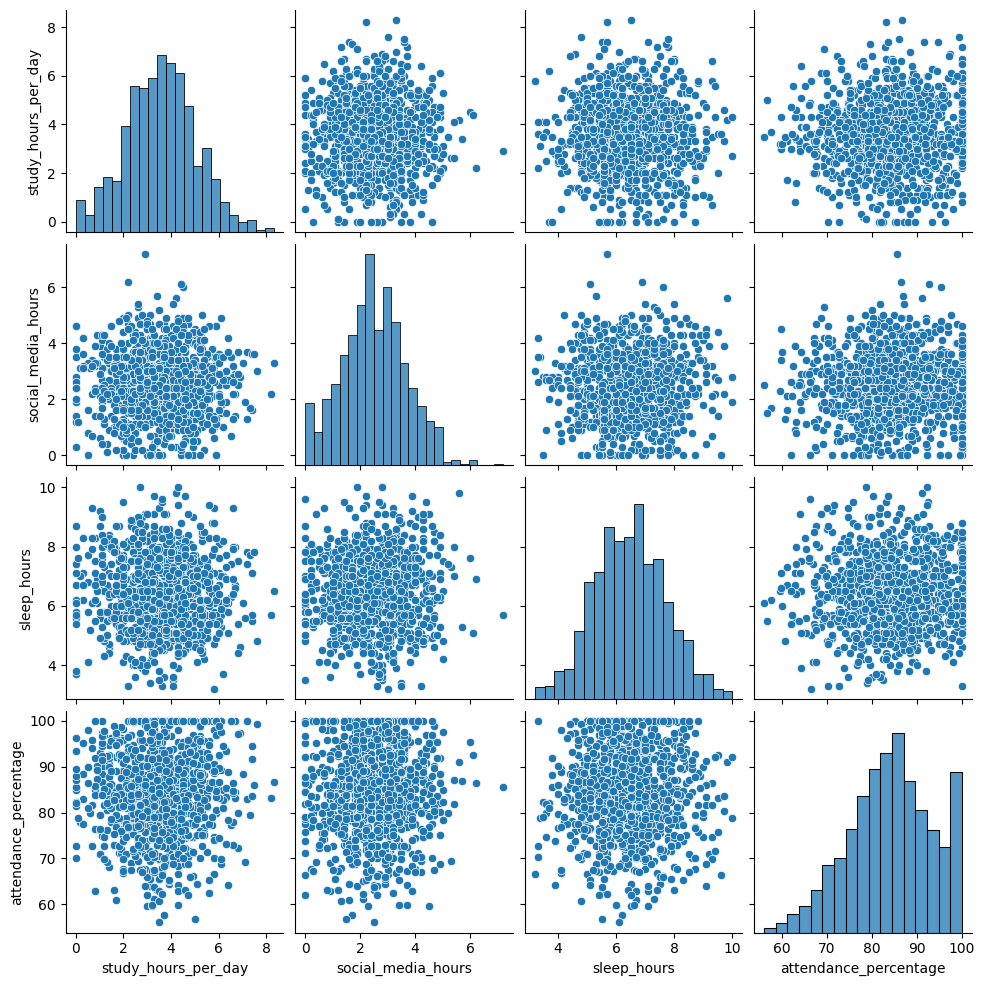

In [9]:
sns.pairplot(Filtered_df)

Here we see that there are a few values that seem to be particularly far away from the rest of the data, and since we would like results that are quite consistent, we will remove the outliers so they don't affect the data as much, but one downside is that our analysis will be less representative of the population of our original dataset without the dropped outliers. Specifically we will want 'social_media_hours' to be equal to or less than 6, 'sleep_hours' less than or equal to 10, and 'study_hours_per_day' to be less than or equal to 8.

In [10]:
Altered_df = Filtered_df[(Filtered_df["sleep_hours"] <= 10) & (Filtered_df["social_media_hours"] <= 6) & (Filtered_df["study_hours_per_day"] <= 8)]
print("We dropped", Filtered_df.shape[0] - Altered_df.shape[0], "rows")

We dropped 5 rows


## 4. Preliminary Analysis

Visualizing the relationships between the explanatory variables and the response variable.

In [11]:
Altered_df

,gender,study_hours_per_day,social_media_hours,sleep_hours,attendance_percentage,part_time_job
0,Female,0.0,1.2,8.0,85.0,No
1,Female,6.9,2.8,4.6,97.3,No
2,Male,1.4,3.1,8.0,94.8,No
3,Female,1.0,3.9,9.2,71.0,No
4,Female,5.0,4.4,4.9,90.9,No
...,...,...,...,...,...,...
995,Female,2.6,0.5,7.5,77.0,No
996,Female,2.9,1.0,6.8,86.0,Yes
997,Male,3.0,2.6,6.5,61.9,No
998,Male,5.4,4.1,7.6,100.0,Yes


Text(0.5, 1.0, 'Relationship between Part Time Job and Gender')

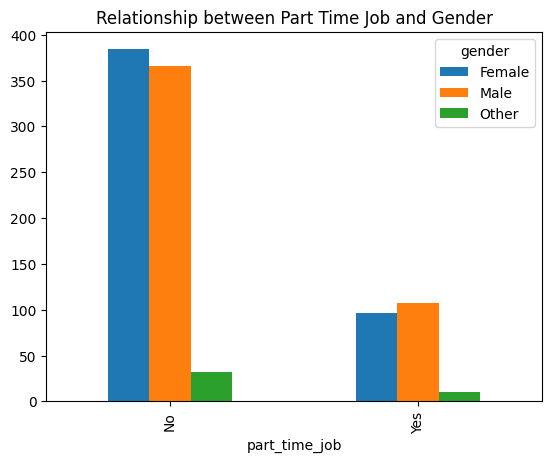

In [12]:
cat = pd.crosstab(Altered_df['part_time_job'], Altered_df['gender'])
cat.plot.bar()
plt.title('Relationship between Part Time Job and Gender')

Text(0.5, 1.0, 'Relationship between Study Hours Per Day and Part Time Job')

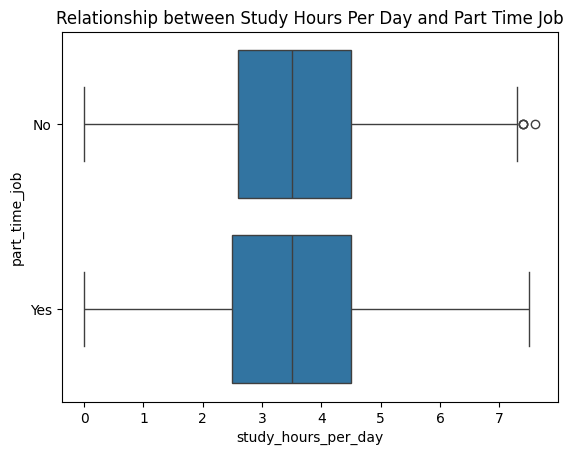

In [13]:
sns.boxplot(data=Altered_df, x='study_hours_per_day', y='part_time_job')
plt.title('Relationship between Study Hours Per Day and Part Time Job')


Text(0.5, 1.0, 'Relationship between Social Media Hours and Part Time Job')

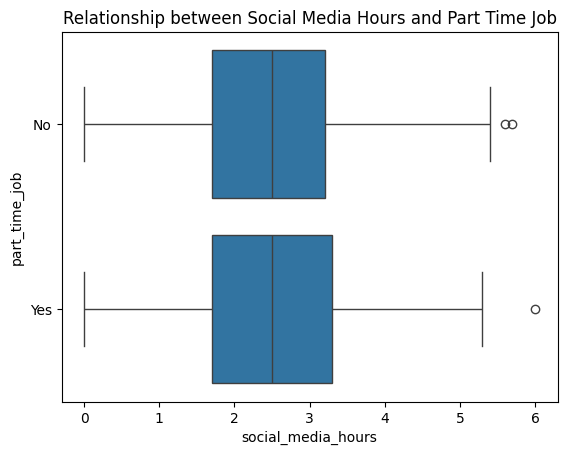

In [14]:
sns.boxplot(data=Altered_df, x='social_media_hours', y='part_time_job')
plt.title('Relationship between Social Media Hours and Part Time Job')

Text(0.5, 1.0, 'Relationship between sleep hours and Part Time Job')

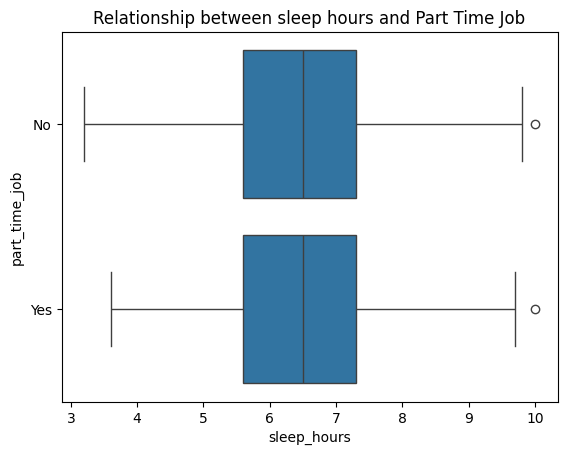

In [15]:
sns.boxplot(data=Altered_df, x='sleep_hours', y='part_time_job')
plt.title('Relationship between sleep hours and Part Time Job')

Text(0.5, 1.0, 'Relationship between Attendance Percentage and Part Time Job')

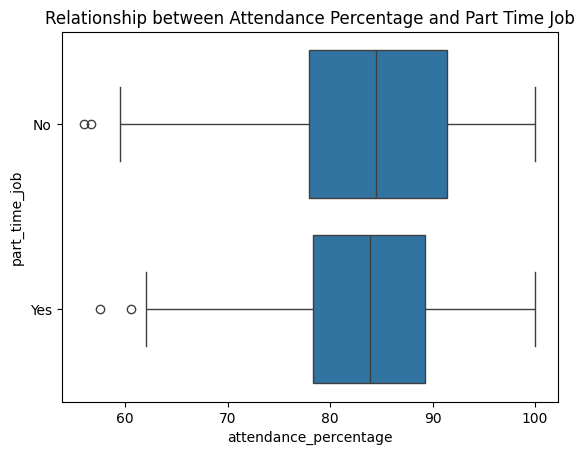

In [16]:
sns.boxplot(data=Altered_df, x='attendance_percentage', y='part_time_job')
plt.title('Relationship between Attendance Percentage and Part Time Job')

In [17]:
Altered_df['part_time_indicator'] = Altered_df['part_time_job'].replace({'Yes':1, 'No':0})
Altered_df

C:\Users\17087\AppData\Local\Temp\ipykernel_53360\1601390730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Altered_df['part_time_indicator'] = Altered_df['part_time_job'].replace({'Yes':1, 'No':0})


,gender,study_hours_per_day,social_media_hours,sleep_hours,attendance_percentage,part_time_job,part_time_indicator
0,Female,0.0,1.2,8.0,85.0,No,0
1,Female,6.9,2.8,4.6,97.3,No,0
2,Male,1.4,3.1,8.0,94.8,No,0
3,Female,1.0,3.9,9.2,71.0,No,0
4,Female,5.0,4.4,4.9,90.9,No,0
...,...,...,...,...,...,...,...
995,Female,2.6,0.5,7.5,77.0,No,0
996,Female,2.9,1.0,6.8,86.0,Yes,1
997,Male,3.0,2.6,6.5,61.9,No,0
998,Male,5.4,4.1,7.6,100.0,Yes,1


In [18]:
Altered_df.corr(numeric_only=True)

,study_hours_per_day,social_media_hours,sleep_hours,attendance_percentage,part_time_indicator
study_hours_per_day,1.000000,0.022401,-0.025451,0.025815,-0.033506
social_media_hours,0.022401,1.000000,0.023367,0.036834,0.015717
sleep_hours,-0.025451,0.023367,1.000000,0.014721,0.002084
attendance_percentage,0.025815,0.036834,0.014721,1.000000,-0.042207
part_time_indicator,-0.033506,0.015717,0.002084,-0.042207,1.000000


#### 1. Which explanatory variables have strong relationships with the response variable?
Attendance percentage has the strongest relationship with part time job. 


#### 2. Which explanatory variables have weak relationships with the response variable?
Sleep hours has the weakest relationship with part time job.



#### 3. Visualize the relationship between each pair of your explanatory variables with the appropriate plot.

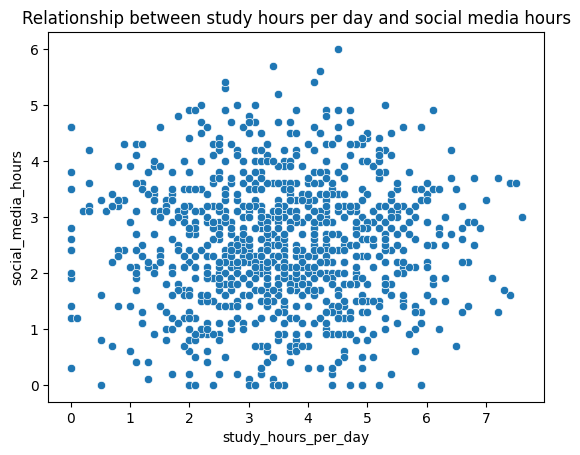

In [19]:
sns.scatterplot(x='study_hours_per_day', y='social_media_hours', data=Altered_df)
plt.title("Relationship between study hours per day and social media hours")
plt.show()

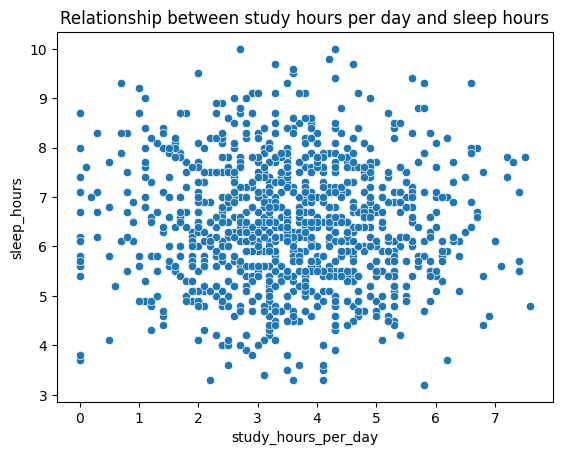

In [20]:
sns.scatterplot(x='study_hours_per_day', y='sleep_hours', data=Altered_df)
plt.title("Relationship between study hours per day and sleep hours")
plt.show()

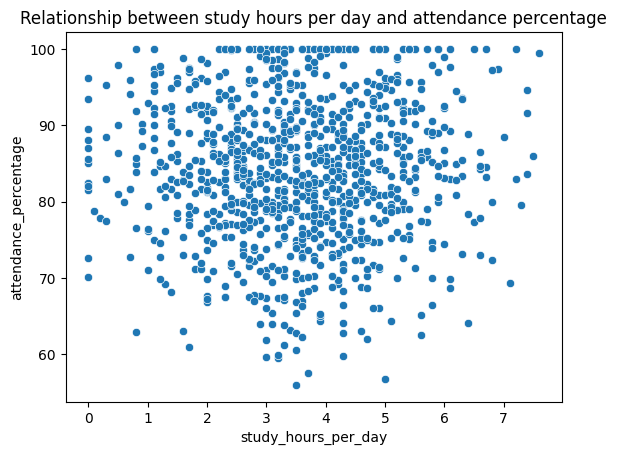

In [21]:
sns.scatterplot(x='study_hours_per_day', y='attendance_percentage', data=Altered_df)
plt.title("Relationship between study hours per day and attendance percentage")
plt.show()

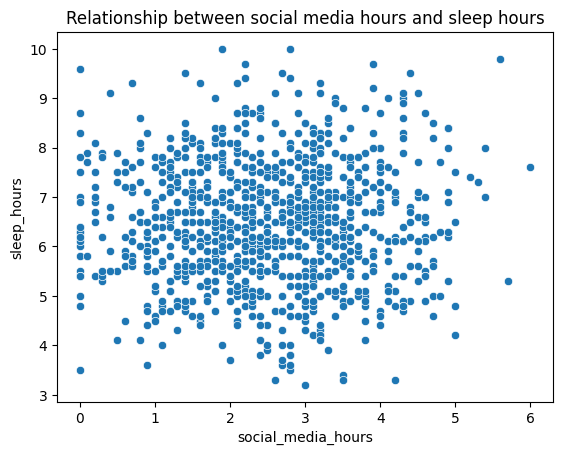

In [22]:
sns.scatterplot(x='social_media_hours', y='sleep_hours', data=Altered_df)
plt.title("Relationship between social media hours and sleep hours")
plt.show()

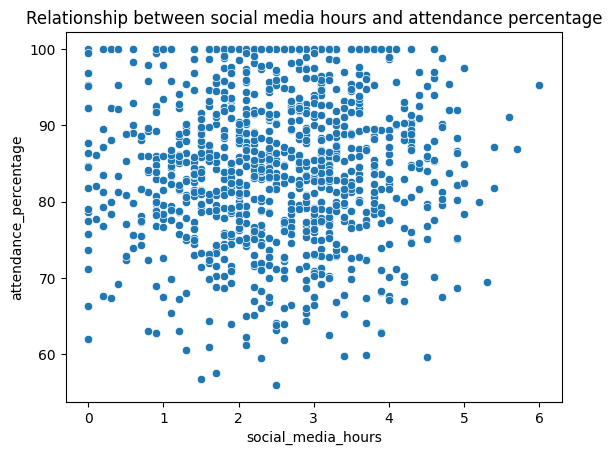

In [23]:
sns.scatterplot(x='social_media_hours', y='attendance_percentage', data=Altered_df)
plt.title("Relationship between social media hours and attendance percentage")
plt.show()

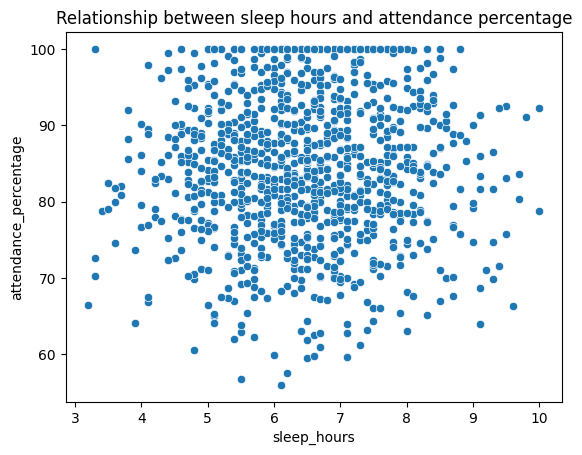

In [24]:
sns.scatterplot(x='sleep_hours', y='attendance_percentage', data=Altered_df)
plt.title("Relationship between sleep hours and attendance percentage")
plt.show()

Text(0.5, 1.0, 'Relationship between gender and social media hours')

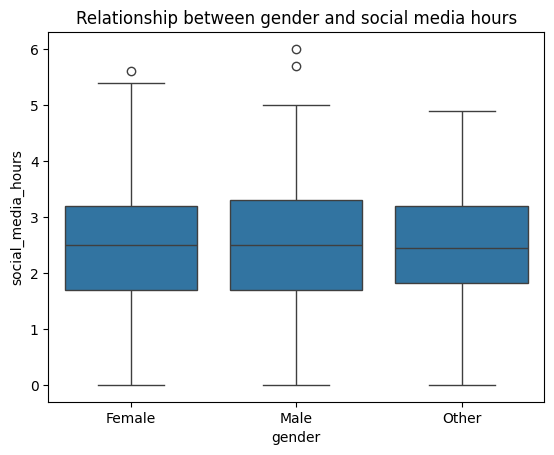

In [25]:
sns.boxplot(data=Altered_df, x='gender', y='social_media_hours')
plt.title('Relationship between gender and social media hours')

Text(0.5, 1.0, 'Relationship between gender and sleep hours')

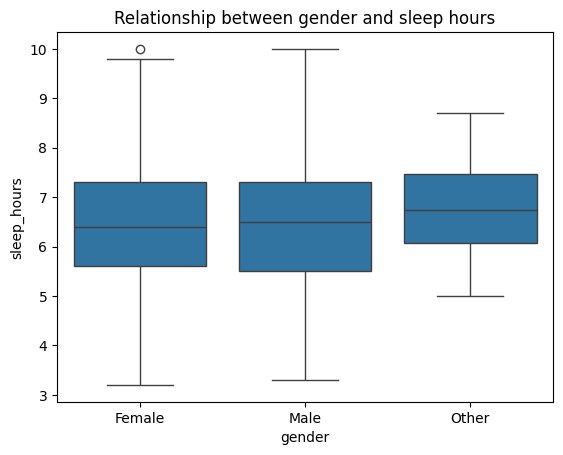

In [26]:
sns.boxplot(data=Altered_df, x='gender', y='sleep_hours')
plt.title('Relationship between gender and sleep hours')

Text(0.5, 1.0, 'Relationship between gender and attendance percentage')

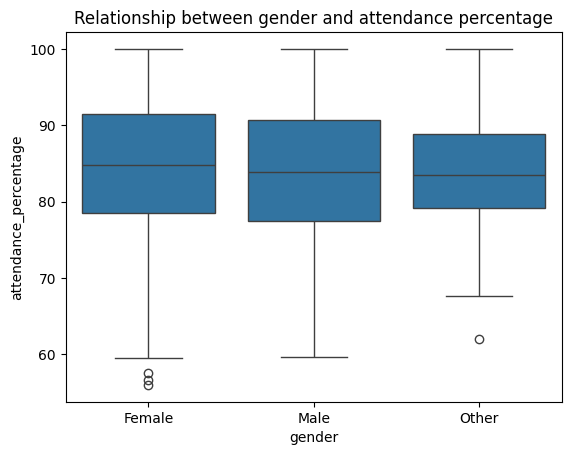

In [27]:
sns.boxplot(data=Altered_df, x='gender', y='attendance_percentage')
plt.title('Relationship between gender and attendance percentage')

Text(0.5, 1.0, 'Relationship between gender and study hours per day')

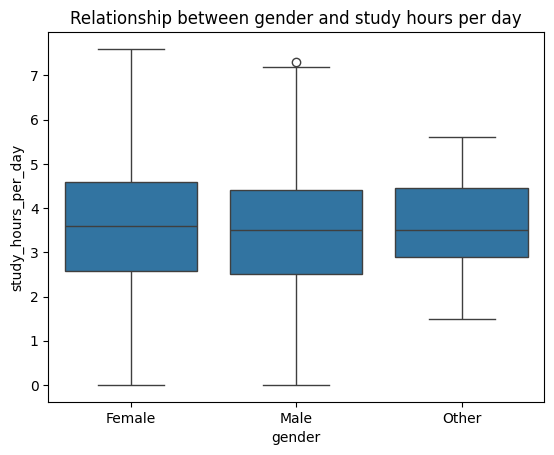

In [28]:
sns.boxplot(data=Altered_df, x='gender', y='study_hours_per_day')
plt.title('Relationship between gender and study hours per day')

#### 4. Are there any pairs of explanatory variables that have strong associations with each other?

Between all of my explanatory variables, gender and sleep hours have the strongest association with each other because the IQR boxes are the most separated.

#### 5. For every (numerical explanatory variable, categorical explanatory variable) pair, determine if there is an interaction between how these two explanatory variables impact the predicted response variable.

Text(0.5, 1.0, 'How Gender and Sleep hours impacts Part Time Job')

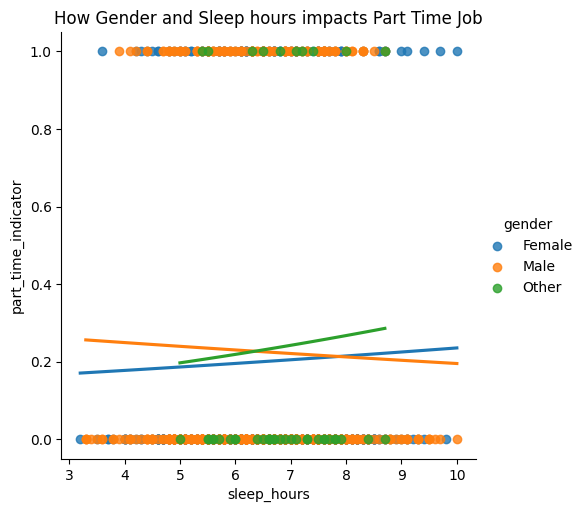

In [29]:
sns.lmplot(x='sleep_hours', y='part_time_indicator', hue='gender', logistic=True,data=Altered_df, ci=False)
plt.title('How Gender and Sleep hours impacts Part Time Job')

Text(0.5, 1.0, 'How Gender and attendance impacts Part Time Job')

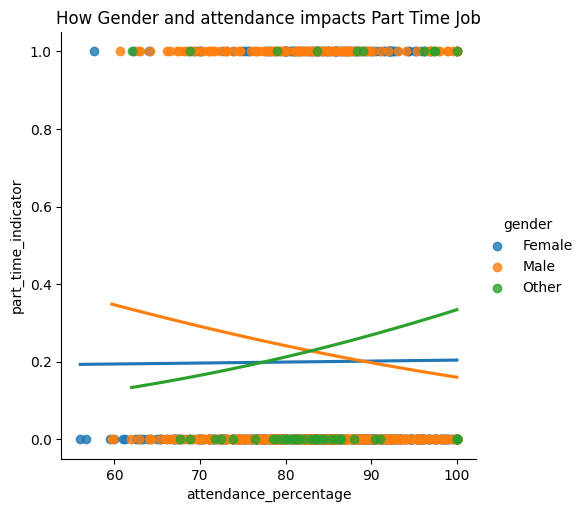

In [30]:
sns.lmplot(x='attendance_percentage', y='part_time_indicator', hue='gender', logistic=True,data=Altered_df, ci=False)
plt.title('How Gender and attendance impacts Part Time Job')

C:\Users\17087\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Text(0.5, 1.0, 'How Gender and study hours impacts Part Time Job')

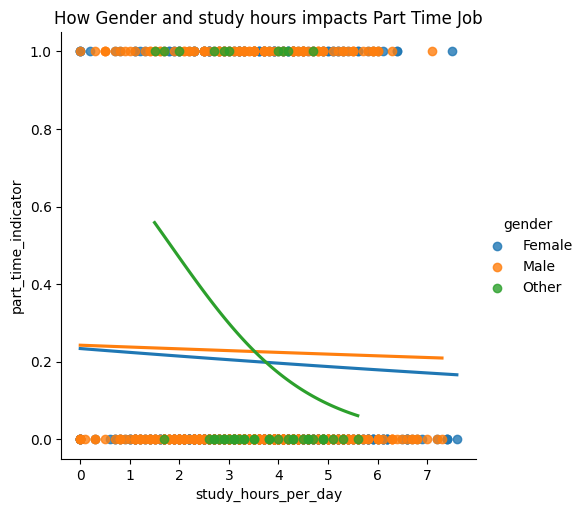

In [31]:
sns.lmplot(x='study_hours_per_day', y='part_time_indicator', hue='gender', logistic=True,data=Altered_df, ci=False)
plt.title('How Gender and study hours impacts Part Time Job')

Text(0.5, 1.0, 'How Gender and social media hours impacts Part Time Job')

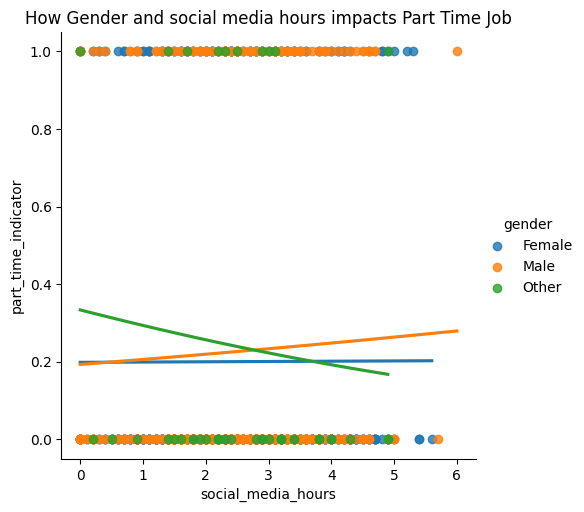

In [32]:
sns.lmplot(x='social_media_hours', y='part_time_indicator', hue='gender', logistic=True,data=Altered_df, ci=False)
plt.title('How Gender and social media hours impacts Part Time Job')

After examination, we see that there is the highest interaction between study hours and gender and how they impact part time job because of the varying slopes. In addition, sleep hours and gender had the weakest interaction with part time job because of the mildly differing slopes. 

## 5. Model Data Preprocessing

In [33]:
features_matrix = Altered_df[['gender', 'study_hours_per_day', 'social_media_hours', 'sleep_hours', 'attendance_percentage']]
target_array = Altered_df[["part_time_indicator"]]

In [34]:
scaler = StandardScaler()
scaled_expl_var = scaler.fit_transform(Altered_df[['study_hours_per_day', 'social_media_hours', 'sleep_hours','attendance_percentage']])
Altered_df[['study_hours_per_day', 'social_media_hours', 'sleep_hours','attendance_percentage']] = pd.DataFrame(scaled_expl_var, columns = ['study_hours_per_day', 'social_media_hours', 'sleep_hours','attendance_percentage'], index = Altered_df.index)
num_vars = Altered_df[['study_hours_per_day', 'social_media_hours', 'sleep_hours','attendance_percentage']]
num_vars

C:\Users\17087\AppData\Local\Temp\ipykernel_53360\1445073409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Altered_df[['study_hours_per_day', 'social_media_hours', 'sleep_hours','attendance_percentage']] = pd.DataFrame(scaled_expl_var, columns = ['study_hours_per_day', 'social_media_hours', 'sleep_hours','attendance_percentage'], index = Altered_df.index)


,study_hours_per_day,social_media_hours,sleep_hours,attendance_percentage
0,-2.433182,-1.120990,1.244340,0.093685
1,2.307038,0.266197,-1.525500,1.400316
2,-1.471398,0.526295,1.244340,1.134740
3,-1.746193,1.219888,2.221931,-1.393536
4,1.001760,1.653384,-1.281102,0.720443
...,...,...,...,...
995,-0.647012,-1.727884,0.837011,-0.756156
996,-0.440915,-1.294388,0.266750,0.199915
997,-0.372217,0.092799,0.022352,-2.360230
998,1.276556,1.393286,0.918477,1.687137


In [35]:
cat_expl_var = Altered_df[["gender"]]
Indicator_vars = pd.get_dummies(Altered_df[["gender"]], drop_first = True, dtype = int)
Indicator_vars

,gender_Male,gender_Other
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,1,0
998,1,0


In [36]:
Connected = pd.concat([num_vars, Indicator_vars, Altered_df[["part_time_indicator"]]], axis = 1)
Connected

,study_hours_per_day,social_media_hours,sleep_hours,attendance_percentage,gender_Male,gender_Other,part_time_indicator
0,-2.433182,-1.120990,1.244340,0.093685,0,0,0
1,2.307038,0.266197,-1.525500,1.400316,0,0,0
2,-1.471398,0.526295,1.244340,1.134740,1,0,0
3,-1.746193,1.219888,2.221931,-1.393536,0,0,0
4,1.001760,1.653384,-1.281102,0.720443,0,0,0
...,...,...,...,...,...,...,...
995,-0.647012,-1.727884,0.837011,-0.756156,0,0,0
996,-0.440915,-1.294388,0.266750,0.199915,0,0,1
997,-0.372217,0.092799,0.022352,-2.360230,1,0,0
998,1.276556,1.393286,0.918477,1.687137,1,0,1


## 6. Feature Selection with k-Fold Cross-Validation

In order to make more robust estimates as to how a given model might perform when classifying observations in new datasets, we will perform a forward selection algorithm so that we can select the logistic regression model with the highest average test AUC in a k=5 fold cross-validation. 

#### k-Fold Cross-Validation Method

In [37]:
# Instantiate the model
log_mod = LogisticRegression()

In [38]:
# Instantiate the k = 5 fold
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 207)
cross_val

KFold(n_splits=5, random_state=207, shuffle=True)

In [39]:
# Creating a new features matrix and target array

new_features_matrix = Connected.drop(['part_time_indicator'], axis = 1)
new_target_array = Connected[['part_time_indicator']]

In [40]:
# Cross-validation on features matrix and target array using ROC AUC scoring

test_fold_auc = cross_val_score(log_mod, new_features_matrix, new_target_array, cv = cross_val, scoring = 'roc_auc')
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test Fold AUC Score:', test_fold_auc.mean())
print('Std Test Fold AUC Score:', test_fold_auc.std())

C:\Users\17087\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\17087\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\17087\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Test Fold AUC Scores: [0.47622723 0.46466905 0.47878788 0.45582329 0.48436672]
Mean Test Fold AUC Score: 0.47197483482529956
Std Test Fold AUC Score: 0.010318003780665904


C:\Users\17087\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Forward Selection Method to Find Highest Average Test AUC

In [41]:
# Fitting our logistic regression model with just the intercept, average test AUC is 0.5

intercept_model = smf.logit(formula = 'part_time_indicator ~ 1', data = Connected).fit()
phat = intercept_model.predict(Connected)
auc = roc_auc_score(y_true = Connected['part_time_indicator'], y_score = phat)
auc

Optimization terminated successfully.
         Current function value: 0.519300
         Iterations 5


0.5

In [42]:
# Creating a for loop to test each explanatory variable. Permanently adding 'attendance_percentage' to the selection, as it had the highest average test AUC (0.5249).

variables = ['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'attendance_percentage', 'gender_Male', 'gender_Other']
for i in variables:
    selection = 'part_time_indicator ~ ' + i
    print(selection)
    interaction = smf.logit(formula = selection, data = Connected).fit()
    print(roc_auc_score(Connected['part_time_indicator'], interaction.predict(Connected)))

part_time_indicator ~ study_hours_per_day
Optimization terminated successfully.
         Current function value: 0.518738
         Iterations 5
0.5166330463600014
part_time_indicator ~ social_media_hours
Optimization terminated successfully.
         Current function value: 0.519176
         Iterations 5
0.5092906115293637
part_time_indicator ~ sleep_hours
Optimization terminated successfully.
         Current function value: 0.519298
         Iterations 5
0.49985291115833963
part_time_indicator ~ attendance_percentage
Optimization terminated successfully.
         Current function value: 0.518412
         Iterations 5
0.5249270559417888
part_time_indicator ~ gender_Male
Optimization terminated successfully.
         Current function value: 0.518903
         Iterations 5
0.5171583636516457
part_time_indicator ~ gender_Other
Optimization terminated successfully.
         Current function value: 0.519226
         Iterations 5
0.5030138203474899


In [43]:
# Permanently adding 'social_media_hours' to the selection, as it had the next highest average test AUC (0.5303).

variables2 = ['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'gender_Male', 'gender_Other']
for i in variables2:
    selection = 'part_time_indicator ~ attendance_percentage + ' + i
    print(selection)
    interaction = smf.logit(formula = selection, data = Connected).fit()
    print(roc_auc_score(Connected['part_time_indicator'], interaction.predict(Connected)))

part_time_indicator ~ attendance_percentage + study_hours_per_day
Optimization terminated successfully.
         Current function value: 0.517880
         Iterations 5
0.5293847483880264
part_time_indicator ~ attendance_percentage + social_media_hours
Optimization terminated successfully.
         Current function value: 0.518263
         Iterations 5
0.5302942977558445
part_time_indicator ~ attendance_percentage + sleep_hours
Optimization terminated successfully.
         Current function value: 0.518409
         Iterations 5
0.5249000396239328
part_time_indicator ~ attendance_percentage + gender_Male
Optimization terminated successfully.
         Current function value: 0.518044
         Iterations 5
0.529048545321374
part_time_indicator ~ attendance_percentage + gender_Other
Optimization terminated successfully.
         Current function value: 0.518339
         Iterations 5
0.5269232616500366


In [44]:
# Permanently adding 'gender_Male' to the selection, as it had the next highest average test AUC (0.5345)

variables3 = ['study_hours_per_day', 'sleep_hours', 'gender_Male', 'gender_Other']
for i in variables3:
    selection = 'part_time_indicator ~ attendance_percentage + social_media_hours + ' + i
    print(selection)
    interaction = smf.logit(formula = selection, data = Connected).fit()
    print(roc_auc_score(Connected['part_time_indicator'], interaction.predict(Connected)))

part_time_indicator ~ attendance_percentage + social_media_hours + study_hours_per_day
Optimization terminated successfully.
         Current function value: 0.517719
         Iterations 5
0.5292856885558878
part_time_indicator ~ attendance_percentage + social_media_hours + sleep_hours
Optimization terminated successfully.
         Current function value: 0.518260
         Iterations 5
0.5297119460153933
part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male
Optimization terminated successfully.
         Current function value: 0.517892
         Iterations 5
0.5344878306497125
part_time_indicator ~ attendance_percentage + social_media_hours + gender_Other
Optimization terminated successfully.
         Current function value: 0.518193
         Iterations 5
0.5311708271796165


In [45]:
# Permanently adding 'gender_Other' to the selection, as it had the next highest average test AUC (0.5361)

variables4 = ['study_hours_per_day', 'sleep_hours', 'gender_Other']
for i in variables4:
    selection = 'part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + ' + i
    print(selection)
    interaction = smf.logit(formula = selection, data = Connected).fit()
    print(roc_auc_score(Connected['part_time_indicator'], interaction.predict(Connected)))

part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + study_hours_per_day
Optimization terminated successfully.
         Current function value: 0.517376
         Iterations 5
0.5342326765366281
part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + sleep_hours
Optimization terminated successfully.
         Current function value: 0.517887
         Iterations 5
0.5340765822556824
part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other
Optimization terminated successfully.
         Current function value: 0.517733
         Iterations 5
0.5360907988425008


In [46]:
# Permanently adding 'study_hours_per_day' to the selection, as it had the next highest average test AUC (0.5366)

variables5 = ['study_hours_per_day', 'sleep_hours']
for i in variables5:
    selection = 'part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other + ' + i
    print(selection)
    interaction = smf.logit(formula = selection, data = Connected).fit()
    print(roc_auc_score(Connected['part_time_indicator'], interaction.predict(Connected)))

part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other + study_hours_per_day
Optimization terminated successfully.
         Current function value: 0.517212
         Iterations 5
0.536616116134145
part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other + sleep_hours
Optimization terminated successfully.
         Current function value: 0.517731
         Iterations 5
0.536177851422259


In [47]:
# We stop our algorithm and stick with the 'variables5' selection
variables6 = ['sleep_hours']
for i in variables6:
    selection = 'part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other + study_hours_per_day +' + i
    print(selection)
    interaction = smf.logit(formula = selection, data = Connected).fit()
    print(roc_auc_score(Connected['part_time_indicator'], interaction.predict(Connected)))

part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other + study_hours_per_day +sleep_hours
Optimization terminated successfully.
         Current function value: 0.517211
         Iterations 5
0.5365380689936722


#### Conclusion:

Our best model with the highest average test AUC of 0.5366 includes 'attendance_percentage', 'social_media_hours', 'gender_Male', 'gender_Other', and 'study_hours_per_day' explanatory variables.

## 7. Best Model Discussion

#### Train-Test-Split

In [48]:
# Train-Test-Split our dataset

df_train, df_test = train_test_split(Connected, test_size = 0.2, random_state = 207)

In [49]:
# Checking the proportion of observations

df_train.shape[0] / Connected.shape[0]

0.8

#### Fit the Chosen Model

In [50]:
# Fitting the chosen model

chosen_model = smf.logit(formula = 'part_time_indicator ~ attendance_percentage + social_media_hours + gender_Male + gender_Other + study_hours_per_day', data = df_train).fit()
chosen_model.summary()

Optimization terminated successfully.
         Current function value: 0.520059
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     part_time_indicator   No. Observations:                  796
Model:                           Logit   Df Residuals:                      790
Method:                            MLE   Df Model:                            5
Date:                 Sun, 21 Sep 2025   Pseudo R-squ.:                0.003532
Time:                         21:05:29   Log-Likelihood:                -413.97
converged:                        True   LL-Null:                       -415.43
Covariance Type:             nonrobust   LLR p-value:                    0.7101
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.3169      0.125    -10.524      0.000      -1.562      -1.072
attendance_percentage    -0.0647      0.085     -0.757      0.449      -0.232       0.103
social_media_hours        0.1072      0.086      1.246      0.213      -0.061       0.276
gender_Male               0.0611      0.176      0.347      0.728      -0.284       0.406
gender_Other             -0.2682      0.508     -0.528      0.598      -1.264       0.728
study_hours_per_day      -0.0530      0.090     -0.590      0.555      -0.229       0.123
=========================================================================================
"""

#### Equation of the Best Logistic Regression Model

part_time_indicator_hat = 1 / (1 + np.exp(-(-1.3169 - 0.0647 * attendance_percentage + 0.1072 * social_media_hours + 0.0611 * gender_Male - 0.2682 * gender_Other - 0.0530 * study_hours_per_day)))

#### Multicollinearity

The remaining numericalexplanatory variables in this model do not seem to exhibit an issue with multicollinearity because there are no correlation coefficients that are greater than our 0.7 threshold.

In [51]:
Connected[['attendance_percentage', 'social_media_hours', 'study_hours_per_day']].corr()

,attendance_percentage,social_media_hours,study_hours_per_day
attendance_percentage,1.000000,0.036834,0.025815
social_media_hours,0.036834,1.000000,0.022401
study_hours_per_day,0.025815,0.022401,1.000000


For our categorical (indicator) variables, we can see that there is an issue with multicollinearity because there is a correlation coefficient greater than 0.7 between 'gender_Male' and 'gender_Other'.

In [52]:
indicator_vars = pd.crosstab(Connected['gender_Male'], Connected['gender_Other'], normalize = 'index')
indicator_vars

gender_Other,0,1
gender_Male,,
0,0.91954,0.08046
1,1.00000,0.00000


<Axes: xlabel='gender_Male'>

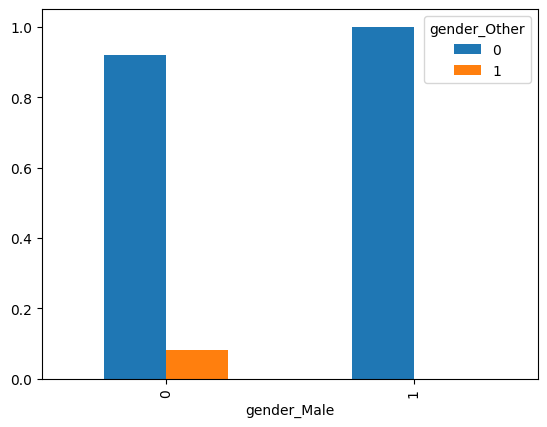

In [53]:
indicator_vars.plot.bar()

#### Slope Interpretations

We are able to interpret the magnitude of the slopes as indicating how important the corresponding explanatory variables are because when doing the forward selection algorithm, we see that when comparing each with 'part_time_indicator' (one on one), 'attendance_percentage' had the a significantly higher average test AUC than all the other ones. We kept this variable and kept adding more until we got the highest possible average test AUC.

The explanatory variable 'attendance_percentage' is determined to have the largest initial impact to the model, followed by 'social_media_hours', 'gender_Male', 'gender_Other', and 'study_hours_per_day' (in order).

#### Overfitting Explanatory Variables

The fact that this is our best model after performing forward selection, it is suggested that 'sleep_hours' is overfitting the model. The mean test AUC of the best model which did not include this variable was higher. This may suggest that 'sleep_hours' was overfitting the model.

The strength between 'sleep_hours' and 'part_time_indicator' is very little, as we can see below in the boxplot that there is no strong association (very similar medians and large overlap of the IQR boxes).

Text(0.5, 1.0, 'Relationship between the amount of sleep and part-time status')

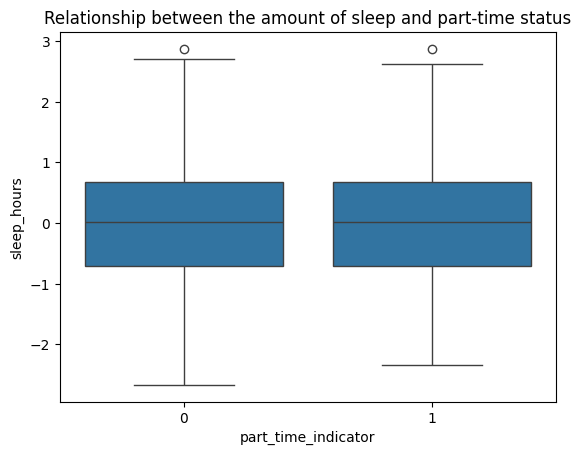

In [54]:
sns.boxplot(data= Connected, x = 'part_time_indicator', y = 'sleep_hours')
plt.title('Relationship between the amount of sleep and part-time status')

This overfitting explanatory variable is not strongly associated with the other explanatory variables that are still left in the model. We can see below that there is no visible linear relatiosnhip with the numerical variables, and the for the boxplots with the categirical variables there is not much overlap.

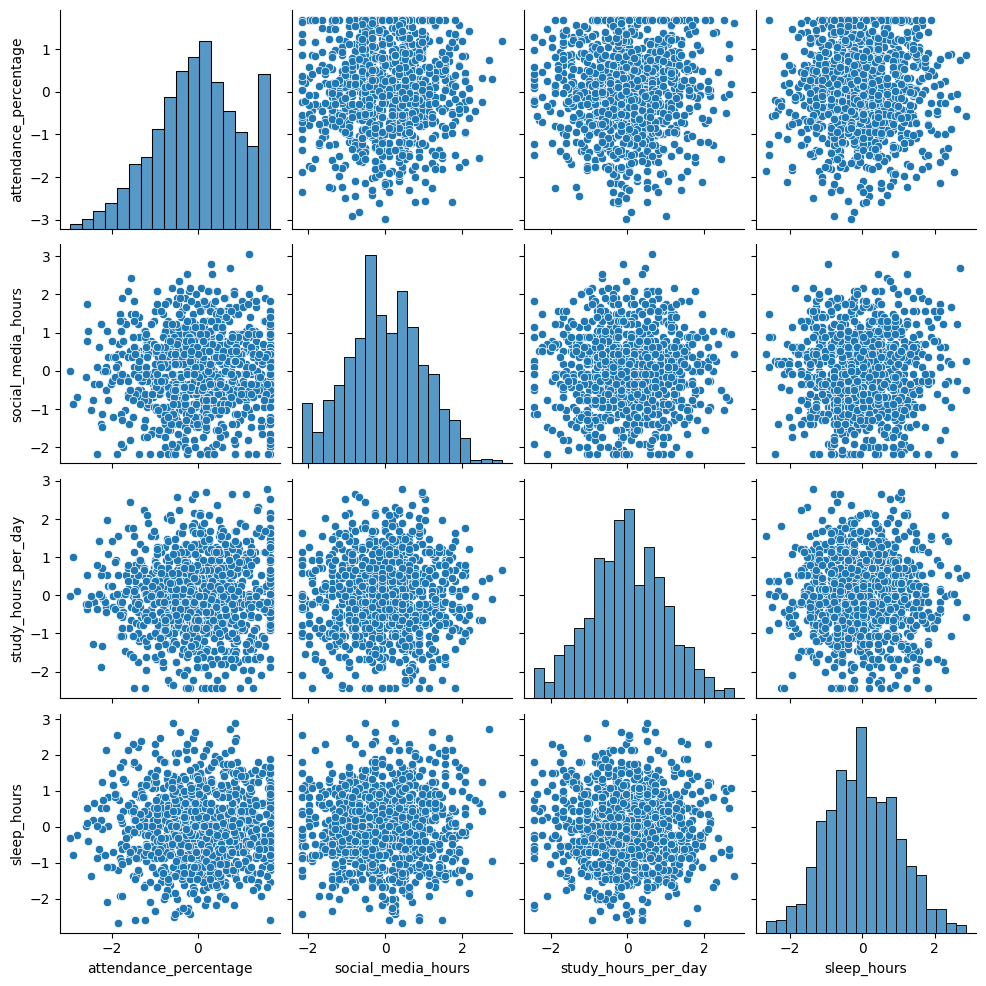

In [55]:
overfitting_numerical = Connected[['attendance_percentage', 'social_media_hours', 'study_hours_per_day', 'sleep_hours']]
sns.pairplot(overfitting_numerical)

Text(0.5, 1.0, 'Relationship between the amount of sleep and gender_Male')

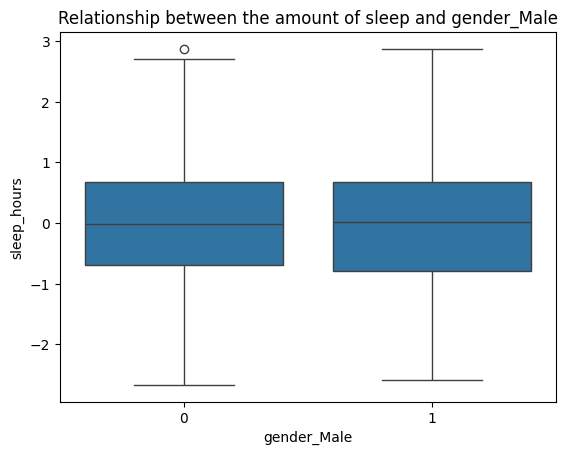

In [56]:
sns.boxplot(data= Connected, x = 'gender_Male', y = 'sleep_hours')
plt.title('Relationship between the amount of sleep and gender_Male')

Text(0.5, 1.0, 'Relationship between the amount of sleep and gender_Other')

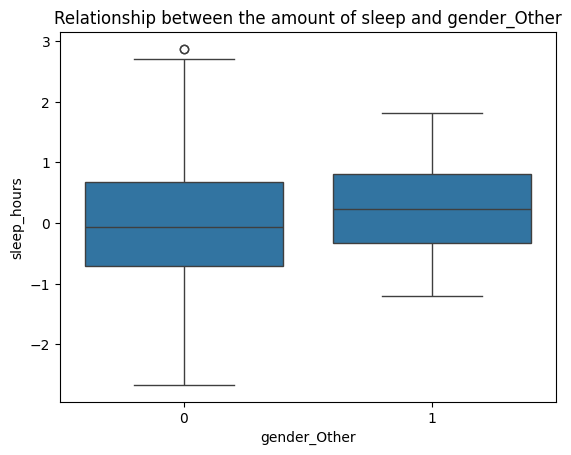

In [57]:
sns.boxplot(data= Connected, x = 'gender_Other', y = 'sleep_hours')
plt.title('Relationship between the amount of sleep and gender_Other')

#### Test ROC and AUC

The test AUC for the chosen model is 0.4772, which is lower than 0.5, also known as “random guessing” (the “realistic” worst case scenario). Thus, we might say that the chosen model is not accurate at all when classifying observations in this test dataset. So, we can conclude that the chosen model will not be accurate in its performance for new datasets.

In [58]:
df_test['predictive_prob'] = chosen_model.predict(df_test)
df_test[['predictive_prob', 'part_time_indicator']]

,predictive_prob,part_time_indicator
511,0.167275,0
401,0.239518,0
608,0.204501,0
562,0.208957,0
597,0.196430,0
...,...,...
683,0.190888,1
126,0.259106,1
871,0.221895,1
661,0.240291,0


In [59]:
fprs, tprs, thresholds = roc_curve(y_true = df_test['part_time_indicator'], y_score = df_test['predictive_prob'])

In [60]:
auc = roc_auc_score(y_true = df_test['part_time_indicator'], y_score = df_test['predictive_prob'])
auc

0.4771534424205002

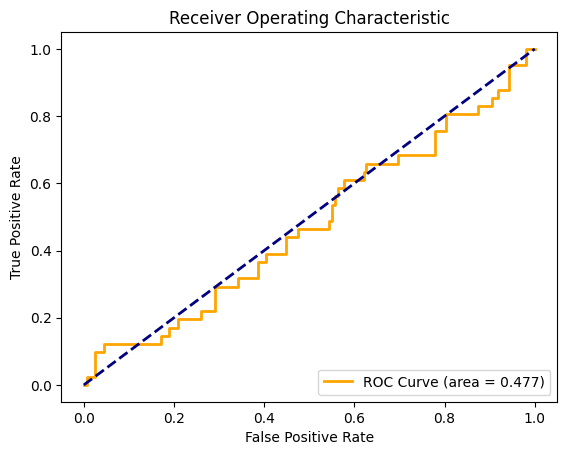

In [61]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'orange', lw = lw, label = 'ROC Curve (area = '+str(round(auc, 3))+')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.show()
plot_roc(fprs, tprs, auc)

#### Best Predictive Probability Threshold

The test FPR and TPR of the classification that would be created using the predicitive probability threshold of 0.5 is an FPR of 0.0 and a TPR of 0.0.

The FPR of 0.0 means 0% of actual students with no part-time jobs were inaccurately classified as having a part-time job.
The TPR of 0.0 means 0% of actual students with part-time jobs were accurately classified as having a part-time job.

In [62]:
def fpr_tpr_thresh(part_time_indicator, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = part_time_indicator, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold' : [thresh], 'fpr' : [fpr], 'tpr' : [tpr]})

fpr_tpr_thresh(df_test['part_time_indicator'], df_test['predictive_prob'], 0.5)

,threshold,fpr,tpr
0,0.5,0.0,0.0


In [63]:
for thresh in np.arange(0, 1.01, 0.01):
    print(fpr_tpr_thresh(df_test['part_time_indicator'], df_test['predictive_prob'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold  fpr  tpr
0       0.05  1.0  1.0
   threshold  fpr  tpr
0       0.06  1.0  1.0
   threshold  fpr  tpr
0       0.07  1.0  1.0
   threshold  fpr  tpr
0       0.08  1.0  1.0
   threshold  fpr  tpr
0       0.09  1.0  1.0
   threshold  fpr  tpr
0        0.1  1.0  1.0
   threshold  fpr  tpr
0       0.11  1.0  1.0
   threshold  fpr  tpr
0       0.12  1.0  1.0
   threshold  fpr  tpr
0       0.13  1.0  1.0
   threshold  fpr  tpr
0       0.14  1.0  1.0
   threshold       fpr  tpr
0       0.15  0.993671  1.0
   threshold       fpr      tpr
0       0.16  0.974684  0.95122
   threshold       fpr      tpr
0       0.17  0.955696  0.95122
   threshold       fpr       tpr
0       0.18  0.911392  0.853659
   threshold       fpr       tpr
0       0.19  0.816456  0.8

## 8. Additional Analysis/Insight


<Figure size 600x500 with 0 Axes>

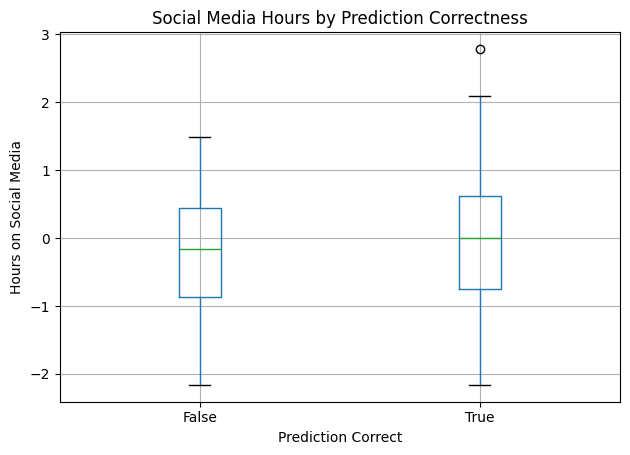

In [64]:
phat = chosen_model.predict(df_test)
y_pred = (phat > 0.5).astype(int)

# Build results DataFrame
results_df = df_test.copy()
results_df['Actual'] = df_test['part_time_indicator']
results_df['Predicted'] = y_pred
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Plot social media hours by prediction correctness
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
results_df.boxplot(column='social_media_hours', by='Correct')
plt.title('Social Media Hours by Prediction Correctness')
plt.suptitle('')
plt.xlabel('Prediction Correct')
plt.ylabel('Hours on Social Media')
plt.tight_layout()
plt.show()


#### Additional Insights
To gain an additional layer of insight beyond our main modeling, we examined how the model performed in terms of correct versus incorrect predictions. Specifically, we looked at whether social media usage had any visible connection to misclassification.

Using a boxplot, we compared social media hours between students the model predicted correctly and those it did not. What we found is that students who were misclassified tended to have more moderate levels of social media usage, whereas correct predictions were slightly more spread toward the extremes.

Although this was not part of our original scope, it helped advance our goal of understanding the behavioral profiles behind the predictions. The result suggests that the model might struggle more with students whose habits do not stand out strongly in one direction. This supports the idea that predictive clarity often arises when features are more distinctive, and it also hints at possible value in exploring interaction effects or more flexible models in future work.


## 9. Conclusion


#### Research Goal Revisited
At the outset of this project, we found ourselves asking a relatively simple, yet layered question: what are the defining factors that might influence whether a student chooses, or is able, to hold a part-time job? The primary ambition here was not only predictive accuracy, though that was certainly of great importance, but also interpretability, to peer behind the curtain of model output and understand the deeper relationships between the explanatory variables and the part-time employment status. In that sense, our objective intertwined both technical rigor and sociological curiosity, seeking to model not just data, but the underlying reality, though simulated, of students' lifestyles.

#### Modeling Process and Justification
After cleaning and preprocessing the dataset, we implemented a forward selection logistic regression model. Starting with just an intercept, we added predictors one at a time based on which ones most improved the model’s AUC score. This stepwise approach allowed us to balance simplicity and performance, building an interpretable model with only the most informative variables.

Rather than employing regularization techniques or more complex algorithms, we prioritized a framework that was both transparent and replicable. This modeling path, although limited in certain aspects, was well-suited to our data structure and allowed for incremental evaluation of each variable’s contribution to the outcome.

#### Key Findings and Interpretations
The final model included attendance percentage, social media hours, and both gender_Male and gender_Other. The strongest single predictor was attendance, with higher attendance associated with a lower likelihood of having a part-time job. Social media hours and gender variables added small but meaningful improvements in predictive power.

It is also important to acknowledge that although we used simulated data, many of the relationships we observed echo real-world tendencies, making them not necessarily conclusive but at least suggestive. The modeling confirmed our assumptions, yet also nuanced them, attendance, more than study hours or even sleep, stood out as the strongest predictor.

#### Methodological Reflections
From a methodological lens, this project reinforced for us the critical importance of preprocessing and thoughtful variable selection. The interpretive clarity of our final results was only made possible by thorough early-stage filtering and data normalization. The removal of outliers, in particular, was a step taken with caution, balancing the risk of excluding rare but genuine behavior against the benefit of model robustness.

We must also underscore the limitations inherent to our approach. Most notably, the dataset we used was not based on real student data but generated through simulation. This restricts the scope of external validity, any conclusions drawn here must be seen more as intellectual exercises than policy-ready insights. Still, the process we followed, framing the question, cleaning and analyzing the data, modeling outcomes, and interpreting results, mirrors what would be expected in real-world applied data science workflows.

#### Future Possibilities
Were we to continue this research, several extensions come to mind. Firstly, it would be ideal to apply the same pipeline to real-world student data, if ethically and legally accessible, to test for consistent patterns. Secondly, we might wish to expand our feature space to include variables such as commute time, household income, or even mental health metrics, which may add nuance to the employment-school balance. Lastly, experimenting with non-linear models like decision trees or gradient boosting machines might reveal interaction effects that linear models are blind to.

#### Closing Reflection
While the forward selection model didn’t produce a very high AUC (final value around 0.536), it did allow us to clearly see which variables mattered most in determining part-time job likelihood. It was a modest but interpretable model that could serve as a foundation for future improvements.

## References

American School Counselor Association. (2024, January). Bridging dreams and realities: A counselor’s guide. https://www.schoolcounselor.org/Newsletters/January-2024/Bridging-Dreams-and-Realities-A-Counselor-s-Guide?st=TX


College Board. (n.d.). Work-based learning and career planning. https://counselors.collegeboard.org/counseling/prepare/work

Jayaantanaath. (n.d.). Student habits vs academic performance [Dataset]. Kaggle. https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance?resource=download